In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
from PIL import Image
import cv2
import time
import random
import shutil
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image


Ultralytics YOLOv8.0.35  Python-3.8.6 torch-1.13.1+cpu CPU
Setup complete  (8 CPUs, 16.0 GB RAM, 129.2/931.5 GB disk)


In [66]:
#Here we load the folder with images
files = glob.glob('weapons/images/*')

In [67]:
#Save the images into a list converted to numpy array each
dataset = [np.array(Image.open(file)) for file in files]

In [68]:
#check the shape of images. That will help us to understand that there are grayscale images. The images with no channels.
dataset[113].shape


(731, 1300)

In [70]:
#Create a new array where will be saved reshape images to make grayscale images with 3 channels
#We do this because to convert to NumPy arrays, it is required to have all elements in the dataset have the same shape or size.
#This cell will change only the shape of the images, namely their channels. From 0 to 3. 
ArrayDataset = []
index = 0
for item in dataset:
    #
    try:
        item.shape[2]
        ArrayDataset.append(item)
    except IndexError:
        #This code line transforms the index element of the dataset
        #from a 1D array of shape (N,) to a 2D array of shape (N, 3) by adding a new axis and 
        #repeating the elements along that axis 3 times.
        item_reshaped = np.repeat(dataset[index][..., np.newaxis], 3, axis=-1)
        ArrayDataset.append(item_reshaped)
    index = index + 1
        

In [6]:
# We check that new array has the same length as initial
print(len(ArrayDataset))
print(len(dataset))

3000
3000


In [71]:
# Check the shape of the image if it was transformed to 2D array of shape (N, 3)
print(ArrayDataset[113].shape)

(731, 1300, 3)


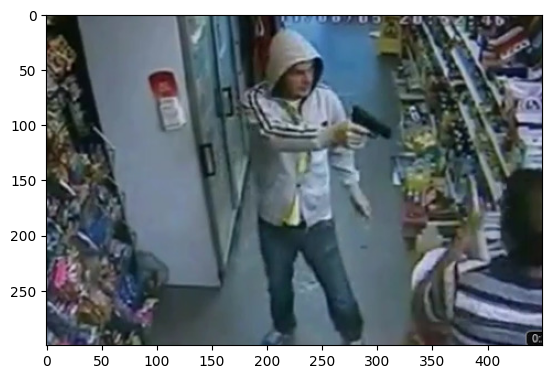

In [8]:
# BGR image
# plt.imshow(dataset[114])
plt.imshow(ArrayDataset[2214])
# ArrayDataset[113].shape

In [9]:
#Now we need to conver image to RGB, since they were red as BGR
# plt.imshow(cv2.cvtColor(dataset[113], cv2.COLOR_BGR2RGB))
# ArrayDatasetRGB = []
# for item in ArrayDataset:
#     RGBItem = cv2.cvtColor(item, cv2.COLOR_BGR2RGB)
#NO NEED FOR NOW

In [3]:
# Let's load Image annotations from a csv file.
Annotations = pd.read_csv('weapons/train_labels.csv', delimiter=',', nrows=3001)
Annotations.dataframeName = 'annotations'

In [4]:
Annotations.head()

,ID,Label
0,armas (2144).jpg,400 243 788 403 pistol
1,armas (2350).jpg,1 1 159 115 pistol
2,armas (1685).jpg,290 171 346 215 pistol
3,armas (2660).jpg,1 1 157 114 pistol
4,armas (1531).jpg,88 157 401 360 pistol


In [ ]:
# Here we normalise images that the value of pixels in each channel will be in range from 0 to 1
# We divide each image on the maximum value of a pixel it has.
NormalizedArrayDataset = [0]*len(ArrayDataset)
nindex = 0
for item in ArrayDataset:
    
    maxNumber = np.max(item)
    image = item/maxNumber
    NormalizedArrayDataset[nindex] = image
    nindex = nindex + 1

print(nindex)
    
# it can crash if not enough of memory 

In [ ]:
# Check if the size of normalized array is correct
len(NormalizedArrayDataset)


In [ ]:
# Check the values of pixels
print(NormalizedArrayDataset[2999])


In [ ]:
# this is how we crope the annotated aria of an image 
x, y, w, h = 400,243,788,403
cropped = NormalizedArrayDataset[1][y:h, x:w]
plt.imshow(cropped)
plt.show()

In [6]:
AnnotationsArray = np.array(Annotations)

In [ ]:
# files[1]
AnnotationsArray[0][0], files[1]

In [ ]:
# here we use the function to sen the name of file to find its index in the array of loaded images  
def findIndexOfFileAndAnnotation(annotation):
    compIndex = 0
    for item in files:
        if annotation in item:
            print(item)
            return compIndex
        compIndex = compIndex + 1
        
# findIndexOfFileAndAnnotation(AnnotationsArray[0][0])

for i in range(30):
    print(findIndexOfFileAndAnnotation(AnnotationsArray[i][0]))
    print(i)


In [ ]:
plt.imshow(dataset[444])
AnnotationsArray[27]

In [ ]:
x, y, w, h = 138, 13, 483, 276
cropped = NormalizedArrayDataset[444][y:h, x:w]
plt.imshow(cropped)
plt.show()
NormalizedArrayDataset[444].shape

In [ ]:
# Here we create an array of the scropped images

AnnotationsArray[27][1]

In [ ]:
# here we get x, y, w, h for all pixels in the image
def getAllBoxesOfAnImage(annotations):
    pistols = []
    x = annotations.split('pistol')
    print(x)
    for i in range(len(x)-1):
        pistols.append(x[i].split(" "))
        result = [[number for number in sub_arr if number] for sub_arr in pistols]
        
    return result

        
listOfcoordinates = getAllBoxesOfAnImage(AnnotationsArray[27][1])
listOfcoordinates


In [ ]:
# take only annotated of a picture and add to the array
def cropeTheImage(img, coordinates):
#     x, y, w, h = 138, 13, 483, 276
    for z in range(len(coordinates)):
        x = int(coordinates[z][0])
        y = int(coordinates[z][1])
        w = int(coordinates[z][2])
        h = int(coordinates[z][3])
        print(f'{x} {y} {w} {h}')
        cropped = img[y:h, x:w]
#         plt.imshow(cropped)
        NewCropedImageArray.append(cropped)

In [ ]:
NewCropedImageArray = []
for i in range(len(NormalizedArrayDataset)):
    numberOfImage = findIndexOfFileAndAnnotation(AnnotationsArray[i][0]);
    listCoordinates = getAllBoxesOfAnImage(AnnotationsArray[i][1]);
    cropeTheImage(NormalizedArrayDataset[numberOfImage], listCoordinates);
    
    
# cropeTheImage(dataset[444], listOfcoordinates)

In [ ]:
# print(len(NewCropedImageArray))
plt.imshow(NewCropedImageArray[1690])
# len(NormalizedArrayDataset)


In [ ]:
# Join two lists with images
JOINED_IMAGE_DATASET = NewCropedImageArray + NormalizedArrayDataset

In [ ]:
### NEXT PART WE PREPROCESS DATA FOR YOLO

In [164]:
# Here we preprocess annotations to YOLO requirements
folder_name = 'Annotations'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
data = AnnotationsArray

for i in range(data.shape[0]):
    filename = data[i, 0].split('.')[0].split()[-1].strip('()') + '.txt'
    filename = os.path.join(folder_name, filename)
    parts = data[i, 1].split()
    coords = []
    j = 0
    while j < len(parts):
        if parts[j].isdigit():
            x, y, w, h = int(parts[j]), int(parts[j + 1]), int(parts[j + 2]), int(parts[j + 3])
            coords.append((x, y, w, h))
            j += 4
        else:
            j += 1
    
    with open(filename, 'w') as f:
        for k, coord in enumerate(coords):
            f.write(str(0) + ' ' + str(coord[0]) + ' ' + str(coord[1]) + ' ' + str(coord[2]) + ' ' + str(coord[3]) + '\n')

In [167]:
#Here we rename imajes to fit the YOLO requirements and easier access
import re

path = "weapons/images"
new_folder = "refactoredImages"

if not os.path.exists(new_folder):
    os.makedirs(new_folder)

for filename in os.listdir(path):
    if filename.endswith(".jpg"):
        old_file = os.path.join(path, filename)
        new_filename = re.search(r'\((\d+)\)', filename).group(1) + ".jpg"
        new_file = os.path.join(new_folder, new_filename)
        shutil.copy2(old_file, new_file)

In [168]:
#Here we load the folder with images
files2 = os.listdir("refactoredImages")
#Load the .txt files
annot = os.listdir("Annotations")
#Sort images
sorted_images = sorted(files2, key=lambda x: int(x.split('.')[0]))
#Sort annotations
sorted_annot = sorted(annot, key=lambda x: int(x.split('.')[0]))


In [169]:
# Create an empty list to store the image arrays
image_arrays_array = []

# Loop over the file names and load each image as a NumPy array
for file_name in sorted_images:
    # Construct the full file path
    file_path = os.path.join("refactoredImages", file_name)
    # Load the image with PIL and convert it to a NumPy array
    image = np.array(Image.open(file_path))
    # Add the image array to the list
    image_arrays_array.append(image)
    


In [170]:
#Create a new array where will be saved reshape images to make grayscale images with 3 channels
#We do this because to convert to NumPy arrays, it is required to have all elements in the dataset have the same shape or size.
#This cell will change only the shape of the images, namely their channels. From 0 to 3. 
ArrayDataset2 = []
index = 0
g = 0
for item in image_arrays_array:
        #This code line transforms the index element of the dataset
        #from a 1D array of shape (N,) to a 2D array of shape (N, 3) by adding a new axis and 
        #repeating the elements along that axis 3 times.
    try:
        item.shape[2]
        ArrayDataset2.append(item)
    except IndexError:
        #This code line transforms the index element of the dataset
        #from a 1D array of shape (N,) to a 2D array of shape (N, 3) by adding a new axis and 
        #repeating the elements along that axis 3 times.
        item_reshaped = np.expand_dims(item, axis=-1)
        item_reshaped = np.repeat(item_reshaped, 3, axis=-1)
        ArrayDataset2.append(item_reshaped)
#     item_reshaped = np.repeat(image_arrays_array[index][..., np.newaxis], 3, axis=-1)
#     ArrayDataset2.append(item_reshaped)
index = index + 1

In [171]:
## LET'S TO CONVERT ANNOTATIONS TO YOLO FORMAT
import os


annot_dir = 'Annotations'
image_dir = 'refactoredImages'


if os.path.exists('Annotations'):
    if not os.path.exists('Annotations/ann'):
        os.makedirs('Annotations/ann')


for i, (annot_file, image_file) in enumerate(zip(sorted_annot, sorted_images)):
    
    with open(os.path.join(annot_dir, annot_file), 'r') as f:
        for line in f:
            values = line.strip().split()
            x1 = float(values[1])
            y1 = float(values[2])
            x2 = float(values[3])
            y2 = float(values[4])
#             if i != 11:
#                 print(ArrayDataset2[i].shape[0])
            x_center = (x1 + x2) / (2 * ArrayDataset2[i].shape[1])
            y_center = (y1 + y2) / (2 * ArrayDataset2[i].shape[0])
            width = (x2 - x1) / ArrayDataset2[i].shape[1]
            height = (y2 - y1) / ArrayDataset2[i].shape[0]
            with open(os.path.join('Annotations/ann', annot_file.replace('.txt', '.txt')), 'a') as out_f:
                out_f.write(f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")


In [172]:


def shuffle_and_split_data(data_dir, train_percent, val_percent, test_percent):

    all_files = os.listdir(data_dir)

    random.shuffle(all_files)
    

    num_files = len(all_files)
    train_files = int(num_files * train_percent)
    val_files = int(num_files * val_percent)
    test_files = int(num_files * test_percent)

    train_set = all_files[:train_files]
    val_set = all_files[train_files:train_files + val_files]
    test_set = all_files[train_files + val_files:train_files + val_files + test_files]
    

    train_dir = os.path.join(data_dir, "train")
    val_dir = os.path.join(data_dir, "val")
    test_dir = os.path.join(data_dir, "test")
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
  
    for file in train_set:
        shutil.copy(os.path.join(data_dir, file), os.path.join(train_dir, file))
    for file in val_set:
        shutil.copy(os.path.join(data_dir, file), os.path.join(val_dir, file))
    for file in test_set:
        shutil.copy(os.path.join(data_dir, file), os.path.join(test_dir, file))


data_dir = "Annotations/ann"
train_percent = 0.6
val_percent = 0.2
test_percent = 0.2
shuffle_and_split_data(data_dir, train_percent, val_percent, test_percent)

In [173]:
def copy_images(text_dir, image_dir, new_dir):

    text_files = [f for f in os.listdir(text_dir) if f.endswith(".txt")]

    os.makedirs(new_dir, exist_ok=True)
    

    for text_file in text_files:
        image_file = text_file.replace(".txt", ".jpg")
        if image_file in os.listdir(image_dir):
            shutil.copy(os.path.join(image_dir, image_file), os.path.join(new_dir, image_file))

# This is for training
text_dir = "Annotations/ann/train"
image_dir = "refactoredImages"
new_dir = "refactoredImages/train"
copy_images(text_dir, image_dir, new_dir)


In [174]:
# This is for test
text_dir = "Annotations/ann/test"
image_dir = "refactoredImages"
new_dir = "refactoredImages/test"
copy_images(text_dir, image_dir, new_dir)

In [175]:
# This is for val
text_dir = "Annotations/ann/val"
image_dir = "refactoredImages"
new_dir = "refactoredImages/val"
copy_images(text_dir, image_dir, new_dir)

In [187]:
# Move all directories into a required format
if os.path.exists('Annotations'):
    if not os.path.exists('Annotations/data'):
        os.makedirs('Annotations/data')
    if os.path.exists('Annotations/data'):
        if not os.path.exists('Annotations/data/train'):
            os.makedirs('Annotations/data/train')
            os.makedirs('Annotations/data/test')
            os.makedirs('Annotations/data/val')
    if os.path.exists('Annotations/data/train'):
        os.makedirs('Annotations/data/train/images')
        os.makedirs('Annotations/data/train/labels')
        os.makedirs('Annotations/data/test/images')
        os.makedirs('Annotations/data/test/labels')
        os.makedirs('Annotations/data/val/images')
        os.makedirs('Annotations/data/val/labels')

In [ ]:
# Train model
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117
!git clone https://github.com/ultralytics/yolov5
! cd yolov5 & pip install -r requirements.txt 


In [ ]:
!cd try2 & cd yolov5 & python train.py --img 320 --batch 16 --epochs 300 --data data.yaml --weights yolov5s.pt

In [2]:
!cd try2_complete & python yolov5/detect.py --weights D:/Leeds/Year3/FinalProject/Activity2/try2_complete/yolov5/runs/train/exp2/weights/best.pt --img 320 --conf 0.25 --source D:/Leeds/Year3/FinalProject/Activity2/try2_complete/data/test/images --save-txt


detect: weights=['D:/Leeds/Year3/FinalProject/Activity2/try2_complete/yolov5/runs/train/exp2/weights/best.pt'], source=D:/Leeds/Year3/FinalProject/Activity2/try2_complete/data/test/images, data=yolov5\data\coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-100-g4d28fec Python-3.8.6 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
image 1/600 D:\Leeds\Year3\FinalProject\Activity2\try2_complete\data\test\images\100.jpg: 224x320 1 gun, 126.4ms
image 2/600 D:\Leeds\Year3\FinalProject\Activity2\try2_complete\data\test\images\1000.jpg: 224x320 1 gun, 85.1ms
image 3/600 D:\Leeds\Year3\FinalProject\

In [61]:
import numpy as np
import torch
import cv2

#model = torch.hub.load("ultralytics/yolov5", "custom", path_or_model="D:/Leeds/Year3/FinalProject/Activity2/try2_complete/yolov5/runs/train/exp2/weights/best.pt")
#model.conf = 0.25  # Set the confidence threshold


model = torch.hub.load("ultralytics/yolov5", "custom", path="D:/Leeds/Year3/FinalProject/Activity2/try2_complete/yolov5/runs/train/exp2/weights/best.pt")
model.conf = 0.40


Using cache found in C:\Users\ROG/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-16 Python-3.8.6 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [11]:

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)

    cv2.imshow("YOLOv5", np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

In [1]:

torch.cuda.is_available()


True

In [2]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...


In [2]:
!cd yolov7 & python train.py --weights D:/Leeds/Year3/FinalProject/Activity2/yolov7/runs/train/yolov7/weights/best.pt --data "data/coco.yaml" --workers 4 --batch-size 16 --img 256 --cfg cfg/training/yolov7.yaml --name yolov7 --epochs 100 --hyp data/hyp.scratch.p5.yaml

^C


In [49]:
!cd yolov7 & python detect.py --weights D:/Leeds/Year3/FinalProject/Activity2/yolov7/runs/train/yolov7/weights/best.pt --conf 0.5 --img-size 256 --source D:/Leeds/Year3/FinalProject/Activity2/try2_complete/data/test/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=256, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='D:/Leeds/Year3/FinalProject/Activity2/try2_complete/data/test/images', update=False, view_img=False, weights=['D:/Leeds/Year3/FinalProject/Activity2/yolov7/runs/train/yolov7/weights/best.pt'])
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 Gun, Done. (397.2ms) Inference, (1.0ms) NMS
 The image with the result is saved in: runs\detect\exp3\100.jpg
1 Gun, Done. (261.7ms) Inference, (1.0ms) NMS
 The image with the result is saved in: runs\detect\exp3\1000.jpg
1 Gun, Done. (268.1ms) Inference, (1.0ms) NMS
 The image with the result is saved in: runs\detect\exp3\1011.jpg
1 Gun, Done. (298.9ms) Inference, (1.0ms

YOLOR  v0.1-122-g3b41c2c torch 2.0.0+cpu CPU

c:\Users\ROG\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS


In [73]:
import torch


path = "D:/Leeds/Year3/FinalProject/Activity2/yolov7/runs/train/yolov7/weights/best.pt"

from models.experimental import attempt_load


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = attempt_load(path, device)


AttributeError: Can't get attribute 'MP' on <module 'models.common' from 'C:\\Users\\ROG/.cache\\torch\\hub\\ultralytics_yolov5_master\\models\\common.py'>

In [66]:



cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)

    cv2.imshow("YOLOv7", np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
#Let's train Faster R-CNN

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"